# 一维随机变量

常见分布总结


| 分布 | 名称 | 概率密度函数/概率质量函数 | 期望 | 方差 | 代码 | 代码参数 | 特点 |
| --- | --- | --- | --- | --- | --- | --- | --- |
| **伯努利分布** | $X \sim Bern(p)$ | $P(X=k) = p^k(1-p)^{1-k}$，其中 $k \in \{0, 1\}$ | $E(X) = p$ | $Var(X) = p(1-p)$ | `scipy.stats.bernoulli` | `p`: 成功的概率 | 只有两个可能的取值（0或1），用于描述一次试验中成功的概率 |
| **二项分布** | $X \sim B(n, p)$ | $P(X=k) = \binom{n}{k}p^k(1-p)^{n-k}$，其中 $k \in \{0, 1, ..., n\}$ | $E(X) = np$ | $Var(X) = np(1-p)$ | `scipy.stats.binom` | `n`: 试验次数，`p`: 成功的概率 | 描述在固定次数的独立试验中成功的次数，每次试验成功的概率相同 |
| **几何分布** | $X \sim Geo(p)$ | $P(X=k) = p(1-p)^{k-1}$，其中 $k \in \{1, 2, ...\}$ | $E(X) = \frac{1}{p}$ | $Var(X) = \frac{1-p}{p^2}$ | `scipy.stats.geom` | `p`: 成功的概率 | 描述在一系列独立试验中，第一次成功所需的试验次数 |
| **泊松分布** | $X \sim\Pi(\lambda)$ | $P(X=k) = \frac{e^{-\lambda}\lambda^k}{k!}$，其中 $k \in \{0, 1, ...\}$ | $E(X) = \lambda$ | $Var(X) = \lambda$ | `scipy.stats.poisson` | `lam`: 事件的平均发生率 | 描述在固定时间间隔内事件发生的次数，事件的发生是独立的且具有恒定的速率 |
| **均匀分布** | $X \sim U(a, b)$ | $f(x) = \begin{cases} \frac{1}{b-a} & \text{if } a \leq x \leq b \\ 0 & \text{otherwise} \end{cases}$ | $E(X) = \frac{a+b}{2}$ | $Var(X) = \frac{(b-a)^2}{12}$ | `scipy.stats.uniform` | `loc`: 下限，`scale`: 范围（上限-下限） | 所有可能的取值在给定范围内具有相同的概率 |
| **指数分布** | $X \sim E(\lambda)$ | $f(x) = \lambda e^{-\lambda x}$，其中 $x \geq 0$ | $E(X) = \frac{1}{\lambda}$ | $Var(X) = \frac{1}{\lambda^2}$ | `scipy.stats.expon` | `lam`: 事件的平均发生率 | 描述事件发生的时间间隔，事件的发生是独立的且具有恒定的速率 |
| **正态分布** | $X \sim N(\mu, \sigma^2)$ | $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$ | $E(X) = \mu$ | $Var(X) = \sigma^2$ | `scipy.stats.norm` | `loc`: 均值，`scale`: 标准差 | 具有钟形曲线，广泛用于描述自然现象中的随机变量 |


## 离散随机变量
一般使用分布列表示

### 常见离散随机变量

#### 伯努利随机变量(bernoulli random variable)
伯努利试验是一个有两种结果的简单试验，它的结果是成功或失败，黑或白，开或关，没有中间的立场。

- n 重伯努利试验 就是二项分布



<Axes: ylabel='Probability'>

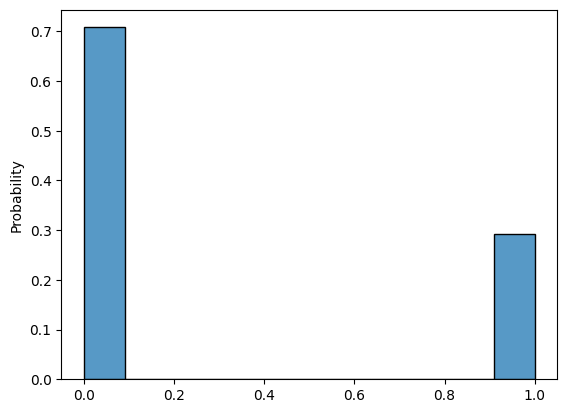

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as st
p=0.3
r = st.bernoulli.rvs(p, size=1000)
sns.histplot(r,stat='probability')

#### 二项随机变量(Binoia random variable)


二项分布的参数：n,p, 随机变量k。用 B(n,p)表示

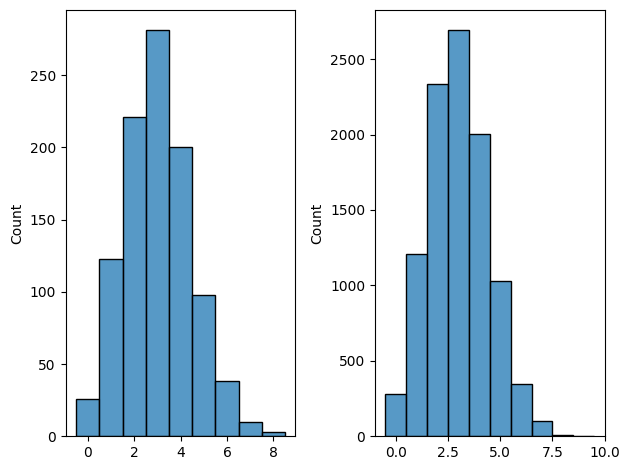

In [2]:
import numpy as np
x=np.random.binomial(10,0.3,1000)
y=np.random.binomial(10,0.3,10000)

import seaborn as sns
import matplotlib.pyplot as plt

f, axs = plt.subplots(1,2)
sns.histplot(x,discrete=True,ax=axs[0],common_bins=True) # discrete=True表示离散数据
sns.histplot(y,discrete=True,ax=axs[1],common_bins=True) # common_bins=True表示两个子图共用一个bin（即x轴的刻度）
f.tight_layout() # 用于调整子图之间的间距

#### 几何随机变量(Geometric)

为什么叫几何分布？
几何关系可以简单理解为等比
就是因为分布的各项，都是等比数列！
就是因为分布的各项，中间项都是前后两项的几何平均数，所以叫几何分布！

> 新手保护期，第一次通过的概率较高，之后概率逐渐降低

伯努利随机变量得到正面结果的概率p,连续多次实验，直到第k次才得到正面结果

$$
p(k) = (1-p)^{k-1}p
$$

[概率论的学习和整理8： 几何分布-CSDN博客](https://blog.csdn.net/xuemanqianshan/article/details/126149038)

<AxesSubplot:ylabel='Probability'>

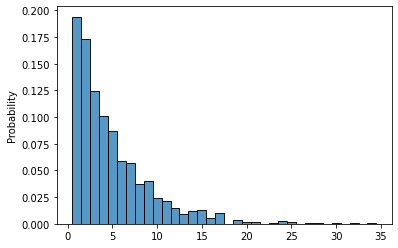

In [5]:
x=np.random.geometric(0.2,1000)
sns.histplot(x,discrete=True,stat='probability')

<AxesSubplot:ylabel='Probability'>

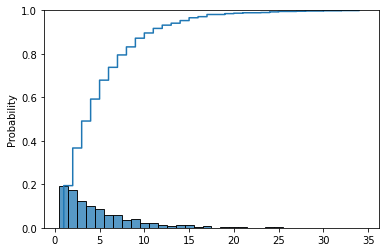

In [6]:
f, axs2 = plt.subplots(1)
sns.histplot(x,discrete=True,stat='probability')
sns.ecdfplot(x,ax=axs2)

In [7]:
import scipy.stats as st

st.geom.cdf(5, 0.2) # 第一个参数随机变量本身的值，第二个参数是函数的参数

0.67232

例题：写一个程序成功的概率是p，连写X次直到成功。X的期望值和方差？

X符合几何分布

\[ p(X) = (1-p)^{x-1}p\]

\[ E(X) = \sum_x x(1-p)^{x-1}p \]

总期望值:

$$
\begin{align*}
    E(X) &= p(x=1)E(X|x=1)+ p(x;1)E(X|x;1)\\
    &= p\cdot 1 + (1-p)(E(X)+1)\\
    &= 1/p
\end{align*}
$$

方差：

$$
\begin{align*}
    E(X^2) &= p(x=1)E(X^2|x=1)+ p(x;1)E(X^2|x;1)\\
    &= p\cdot 1 + (1-p)(E(X+1)^2)\\
    &= p+(1-p)(E(X^2)+2E(X)+1) \\
    &= \frac{2}{p^2}-\frac{1}{p}\\
    var(X) &= E(X^2)-E(X)^2 = \frac{1-p}{p^2}
\end{align*}
$$

In [1]:
import scipy.stats as st
p=0.2
mean, var, skew, kurt = st.geom.stats(p, moments='mvsk')
print(mean, var, skew, kurt)
print(1/p,(1-p)/p**2)

5.0 20.0 2.0124611797498106 6.05
5.0 19.999999999999996


<Axes: ylabel='Probability'>

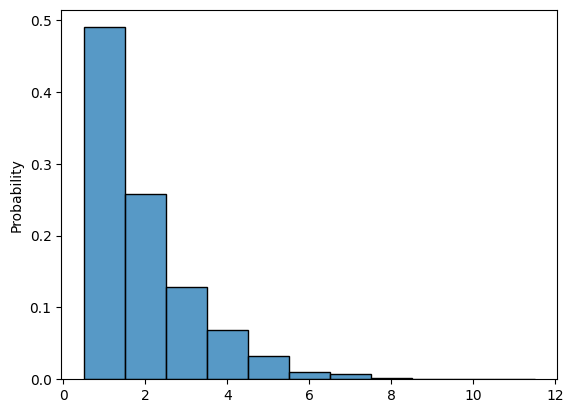

In [6]:
x = np.random.geometric(0.5,1000)
sns.histplot(x,discrete=True,stat='probability')

#### 泊松随机变量(Poisson)
若二项分布中的n很大，p很小，$\lambda = np$，二项分布逼近泊松分布

二项分布和泊松分布可以互相转化的条件：n很大，p很小，$\lambda = np$ 适中

- 当$\lambda$较小时候，泊松分布下降趋势
- 当$\lambda$较大时候，泊松分布比较像高斯分布

<Axes: ylabel='Probability'>

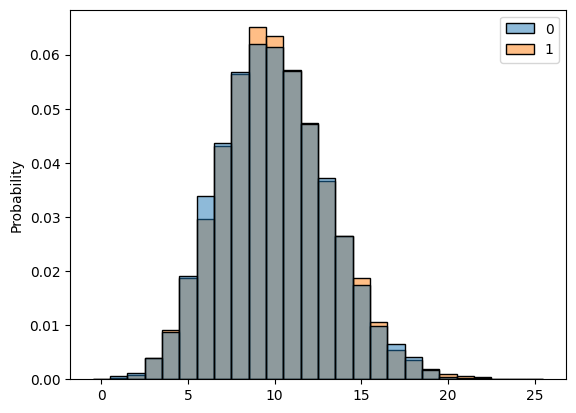

In [1]:
import numpy as np
import seaborn as sns

x=np.random.poisson(10,10000)
y=np.random.binomial(1000,0.01,10000)

sns.histplot([x,y],discrete=True,stat='probability') # 这里将[x,y]打包，可以省去一些代码

## 连续随机变量


rvs：产生服从指定分布的随机数
pdf：概率密度函数
cdf：累计分布函数
sf：残存函数（1-CDF）
ppf：分位点函数（CDF的逆）
isf：逆残存函数（sf的逆）
fit：对一组随机取样进行拟合，最大似然估计方法找出最适合取样数据的概率密度函数系数。
*离散分布的简单方法大多数与连续分布很类似，但是pdf被更换为密度函数pmf。

beta：beta分布
f：F分布
gamma：gam分布
poisson：泊松分布
hypergeom：超几何分布
lognorm：对数正态分布
binom：二项分布
uniform：均匀分布
chi2：卡方分布
cauchy：柯西分布
laplace：拉普拉斯分布
rayleigh：瑞利分布
t：学生T分布
norm：正态分布
expon：指数分布

### 均匀分布

```python
st.uniform(2,5) # 表示的是起点为2，终点为7，长度为5的均匀分布
```


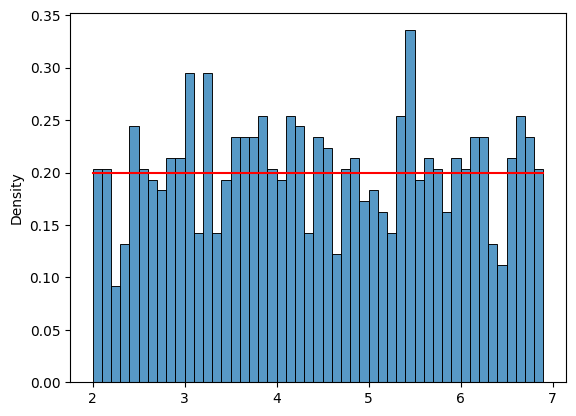

In [4]:
import scipy.stats as st
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


x=np.arange(2,7,0.1)
sns.histplot(y,bins=x,stat='density')
f=st.uniform(2,5).pdf(x)## 注意参数值的意义
plt.plot(x, f,color='r') 

### 正态分布

$$
f(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

cdf: $\Phi(x)$

$$
\Phi(-x) = 1- \Phi(x)
$$

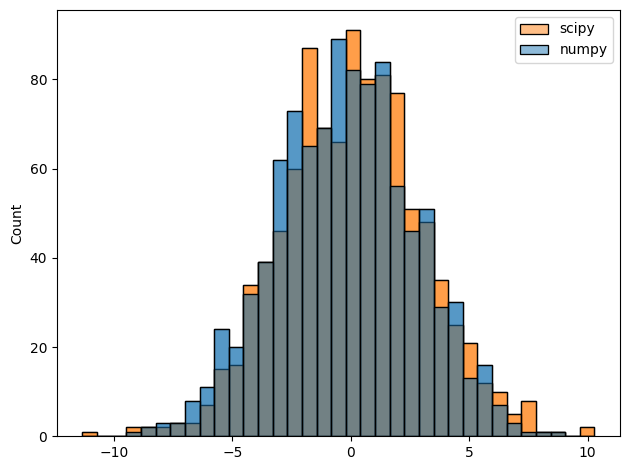

In [16]:
import scipy.stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


x=st.norm.rvs(0,3,1000)
y=np.random.normal(0,3,1000)

ax=sns.histplot([x,y])

### 修改图例
ax=sns.histplot([x,y])
ax.legend(labels=['scipy','numpy'])
plt.tight_layout()
plt.show()

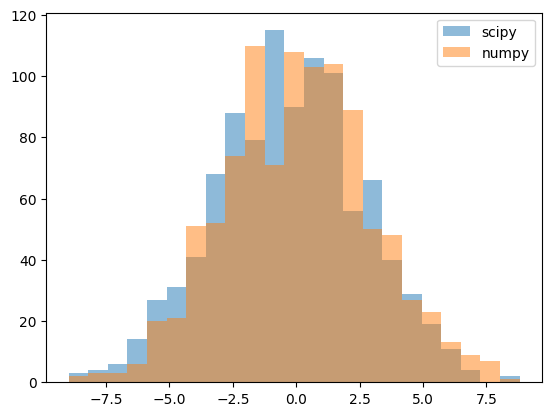

In [17]:
### 修改图例方法2
bin=plt.hist(x, color='C0',alpha=0.5,bins='auto') 
plt.hist(y, bins=bin[1],color='C1',alpha=0.5) 
plt.legend(labels=['scipy','numpy'])

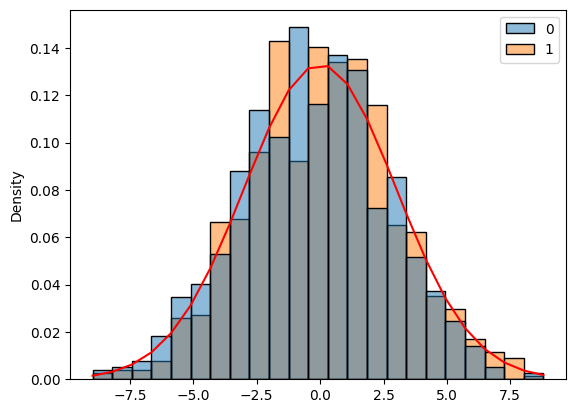

In [18]:
bins = np.histogram_bin_edges(x, bins='auto')
#print(bins)
ax=sns.histplot([x,y],bins=bins,stat='density',common_norm=False)

f = st.norm.pdf(bins, 0, 3)
plt.plot(bins, f,color='r') 

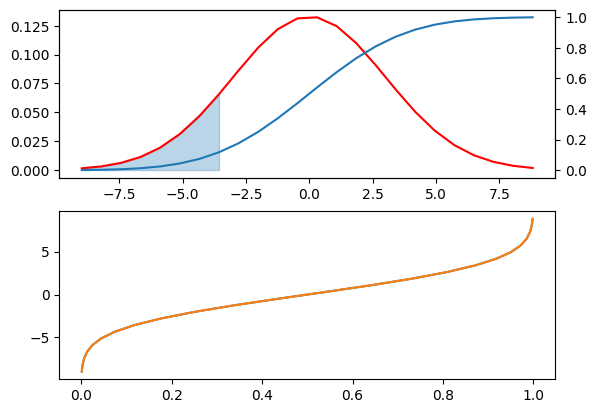

In [19]:
fig,ax = plt.subplots(2,1)
m=0;sigma=3

f = st.norm.pdf(bins,m,sigma)
c = st.norm.cdf(bins,m,sigma)
ppf = st.norm.ppf(c, m,sigma)

ax[0].plot(bins, f,color='r') 
ax2 = ax[0].twinx() ##左右两边的y轴不同
ax2.plot(bins, c) 
ax[0].fill_between(bins,f,where=(bins<-3.),color='C0',alpha=0.3)
ax[1].plot(c,bins)
ax[1].plot(c,ppf)

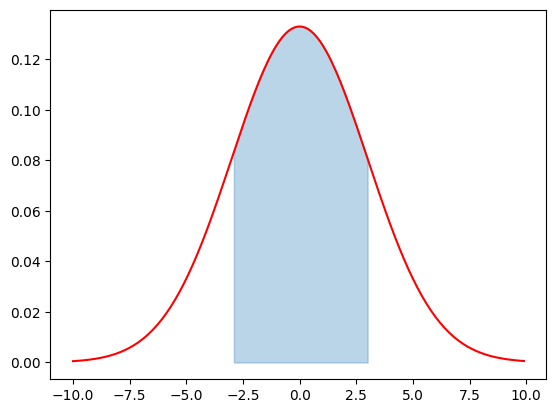

In [20]:
## Confidence Interval，置信区间
bins=np.arange(-10,10,0.1)
fig,ax = plt.subplots(1)
m=0;sigma=3

f = st.norm.pdf(bins,m,sigma)

ax.plot(bins, f,color='r') 
ax.fill_between(bins,f,where=(abs(bins)<sigma),color='C0',alpha=0.3)
#ax.fill_between(bins,f,where=(abs(bins)<2*sigma),color='C1',alpha=0.3)

In [ ]:
# 生成1σ-6σ的区间 
# 1σ约为68 2σ约为95 3σ约为99.7
a="sigma"
for i in range(1,6):
    print (i, a,"CL: ",1-2*st.norm.cdf(-sigma*i,m,sigma))

### 指数分布

$$
\begin{equation}
f(x)= 
\begin{cases}
\lambda e^{-\lambda x} & x>0 \\
0 & x\leq0 \\
\end{cases}
\end{equation}
$$

单位时间事件发生的次数平均值为$\lambda$,时长$x$之内发生的总次数$\lambda x$. 实际观察到的次数符合泊松分布

$$
g(n) = (\lambda x)^n\frac{e^{-\lambda x}}{(n)!}
$$

```
st.expon.rvs(0,0.2,1000)
```

其中第一个参数是平移距离，0.2是$\frac{1}{\lambda}$，1000是样本数

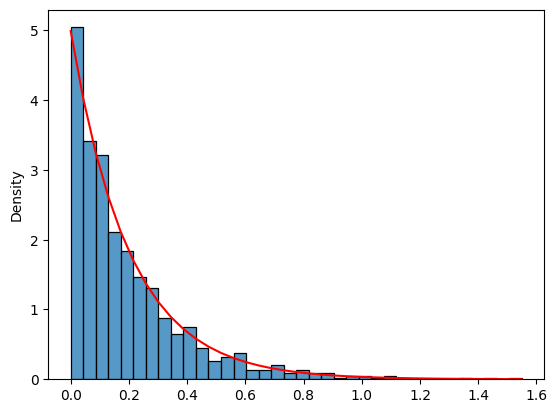

In [12]:
x=st.expon.rvs(0,0.2,1000)

bins = np.histogram_bin_edges(x, bins='auto') #让numpy优化binning，传递给seaborn
ax=sns.histplot(x,bins=bins,stat='density')

f = st.expon.pdf(bins, 0,0.2)
plt.plot(bins, f,color='r') 

In [6]:
print(st.expon.median(0,0.2),st.expon.mean(0,0.2))

0.13862943611198905 0.2


b= [0.00201007 0.00219391 0.00237775 ... 0.92066635 0.9208502  0.92103404]
c= [0.01       0.0109096  0.01181836 ... 0.9899816  0.9899908  0.99      ]
median value= 0.13878818953517857


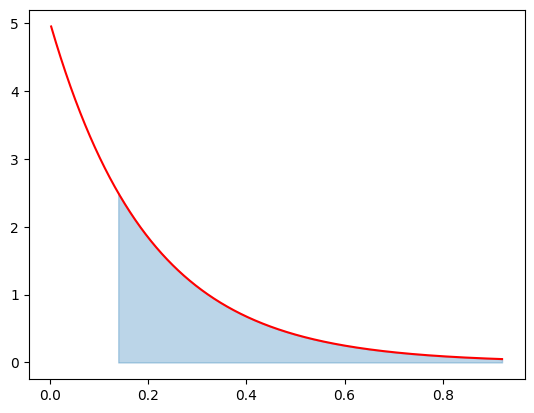

In [13]:
fig,ax = plt.subplots(1)
b = np.linspace(st.expon.ppf(0.01, 0,0.2),
                st.expon.ppf(0.99, 0,0.2), 5000) # ppf返回cdf值为0.01和0.99时所对应的x值
print("b=",b)
f = st.expon.pdf(b,0,0.2)
ax.plot(b, f,color='r')
c = st.expon.cdf(b, 0,0.2)
print("c=",c)
ax.fill_between(b,f,where=(c>0.5),color='C0',alpha=0.3)
print("median value=",b[c>0.5][0]) # b[c>0.5]